Fernando Jimenez Pereyra A01734609
10 de agosoto del 2022

2.3 CHALLENGE: Data management and Descriptive Statistics

In [16]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr


pandas_datareader sirve para obtener datos.

In [17]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

Obtiene datos de yahoo sobre BTC_USD, a partir del primero de enero del 2017, en intervalos de un dia.

In [18]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005
...,...,...,...,...,...,...
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359


In [19]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-07,23359.009766,22894.556641,22963.505859,23175.890625,15886817043,23175.890625
2022-08-08,24203.689453,23176.546875,23179.527344,23809.486328,28575544847,23809.486328
2022-08-09,23898.615234,22982.000000,23811.484375,23164.318359,23555719219,23164.318359
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,32837431722,23947.642578
2022-08-11,24809.279297,23956.478516,23984.750000,24183.378906,37772234752,24183.378906


Es posible que la hora de inicio y de cierre la tome de la bolsa de Estados Unidos. Debido a que las criptomonedas no pagan dividendos el precio de cierre y el precio de cierre ajustado es el mismo. 

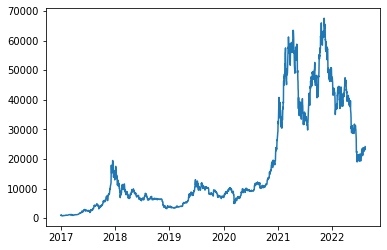

In [20]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [21]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2017-01-01 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2049 non-null   float64
 1   Low        2049 non-null   float64
 2   Open       2049 non-null   float64
 3   Close      2049 non-null   float64
 4   Volume     2049 non-null   int64  
 5   Adj Close  2049 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 112.1 KB


2.3.2.3 Continuously compounded returns

Simple return

In [22]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-07    0.009347
2022-08-08    0.027339
2022-08-09   -0.027097
2022-08-10    0.033816
2022-08-11    0.009844
Name: R, Length: 2049, dtype: float64


Continuosly compounded return

In [23]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [24]:
BTC= BTC.dropna()

La funcion dropna elimina las filas de valores perdidos del primer dia, debido a que no hay datos previos para calcular sus retornos.

In [25]:
sumret = BTC["R"].describe()
sumret

count    2048.000000
mean        0.002420
std         0.041369
min        -0.371695
25%        -0.015888
50%         0.002220
75%         0.020927
max         0.252472
Name: R, dtype: float64

Se puede utilizar operadores logicos en el indice para obtener los datos que nos interesan.

In [26]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2716310016,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,18853799936,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9285289984,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,53980357243,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,68204556440,22487.388672,-0.159747,-0.174053


In [27]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,17950699520,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2249260032,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,12656300032,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,101467222687,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,51000731797,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,21315047816,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,28705065488,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1201760000,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4148069888,3637.520020,0.152956,0.142330


In [28]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015563193199658047
The daily variance of Bitcoin is  0.0017372820366605465
The daily standard deviation (volatility) of Bitcoin return is  0.04168071540485536
The daily median return of Bitcoin is  0.0022173493980961467


3 The Histogram

3.2 CHALLENGES: Histogram

- Do a histogram for daily Bitcoin cc returns. Hints: use the plot.hist function for pandas dataframes, and the BTC dataframe.
- Interpret the histogram with your own words and in CAPITAL LETTERS



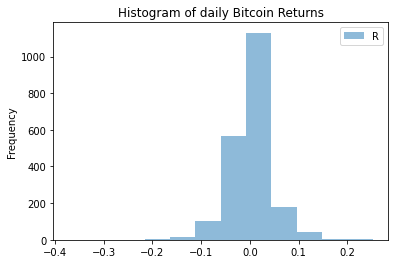

In [29]:
r_bitcoin = pd.DataFrame(BTC[["R"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

Podemos observar que el comportamiento predominante en el valor del bitcoin sun aumentos menores al 5%, seguidos por perdidas menores al 5%, por lo que podemos decir que una inversion en bitcoin a largo plazo seria mas segura que una a corto plazo.

5.2 CHALLENGE: Simulating the normal distribution

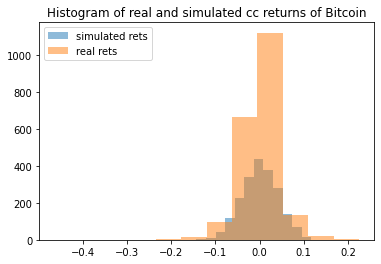

In [122]:
from matplotlib import pyplot
pyplot.clf()
rmean = BTC["r"].mean()
rsd = BTC["r"].std()
N = BTC["r"].count()
simr= np.random.normal(loc=rmean,scale=rsd, size=len(BTC))
realr = BTC["r"].to_numpy()

bins = 12

pyplot.hist(simr,bins,alpha=0.5,label='simulated rets')
pyplot.hist(realr,bins,alpha=0.5,label='real rets')
pyplot.legend(loc='upper left')
pyplot.title(label='Histogram of real and simulated cc returns of Bitcoin')

pyplot.show()

Promedio 0.0015.
Desviacion estandar 0.04168.

La simulacion aparenta tener un comportamiento mas conservador, con una menor presencia de cambias en los retornos en los extremos, lo cual podria llegar a ser bueno para analizar el comportamiento del bitcoin al decirnos que su retorno rondara ente +-4%. Algo de lo que me percate es que apesar de que la posicion base la la simulacion se encuentra muy ligeramente desplazada en el eje positivo de las x, es un cambio lo suficientemente significativo para que en las mayorias de ejecuciones la simulacion presente un ligero pico superior de beneficios menores al 5% en comparacion a las perdidas menores de 5%.